In [251]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw Categories distribution

In [267]:
cat_df = pd.DataFrame({'Category': ['Administration', 'Audit', 'Compliance','Finance','Cosec','Fund Accounting','Investment','Investor Relations','Legel','Operations','Personal','Random','Sales','Strategy','Trust'],
                      'Count': [54,7,52,194,211,1004,149,16,43,139,64,11,111,6,81]})

In [268]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  15 non-null     object
 1   Count     15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [269]:
cat_df.Count.sum()

2142

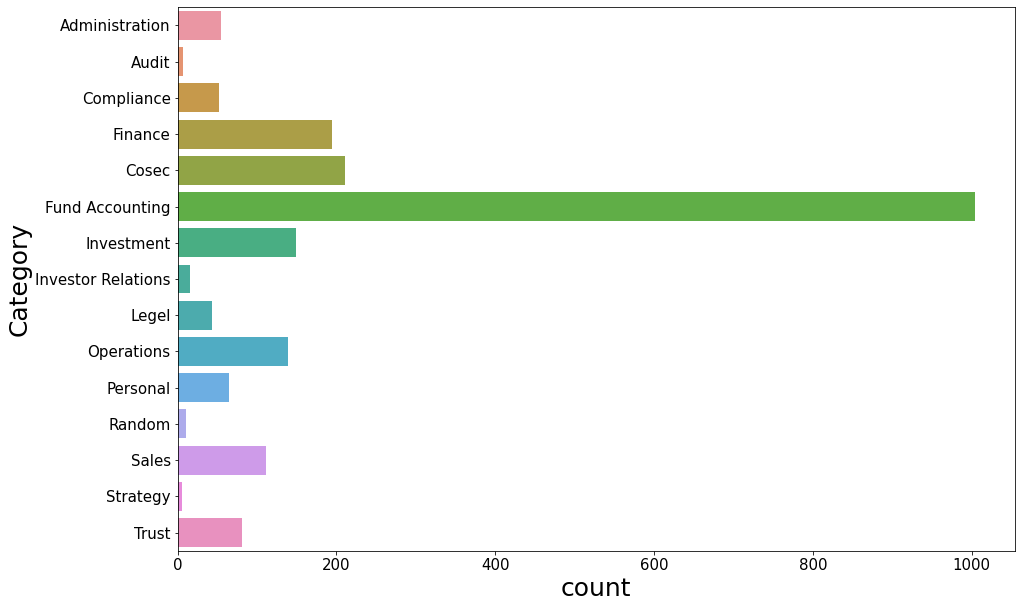

In [224]:
# Plotting the distribution of Categories as a Count Plot

plt.figure(figsize = (15,10))
cv_plot = sns.barplot(y=cat_df.Category, x = cat_df.Count)
cv_plot.set_xlabel('count',fontsize=25);
cv_plot.set_ylabel('Category',fontsize=25);
cv_plot.tick_params(labelsize=15);

# PDF files processing

In [377]:
pdf_folder_path = r'C:\Users\Cohan\Documents\שבתון צחי\Resumes\DB3\Resume&Job_Description\Original_Resumes\**\*.pdf'
pdf_file_list = glob.glob(pdf_folder_path, recursive=True)

In [378]:
pdf_cv_list = []

In [379]:
import fitz # install using: pip install PyMuPDF

for i in range(0,len(pdf_file_list)):
    with fitz.open(pdf_file_list[i]) as doc:
        cv = ""
        for page in doc:
            cv += page.get_text()
    
    file_desc = pdf_file_list[i].split('\\')
    title = file_desc[-1][:-4] # dropping the '.pdf'
    if len(file_desc)==12:
        category = file_desc[-3]
        company_job = file_desc[-2].split(" - ")
        company = company_job[0]
        if len(company_job) == 2:
            job = company_job[1]
        else:
            job = "unknown"
    elif len(file_desc)==11:
        category = file_desc[-2]
        company = "Unknown"
        job = "Unknown"
        
    pdf_cv_list.append([category, company, job, title, cv])

In [380]:
pdf_cv_df = pd.DataFrame(pdf_cv_list, columns=['Category', 'Company', 'Job', 'Title','CV'])

In [381]:
pdf_cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1022 non-null   object
 1   Company   1022 non-null   object
 2   Job       1022 non-null   object
 3   Title     1022 non-null   object
 4   CV        1022 non-null   object
dtypes: object(5)
memory usage: 40.0+ KB


# DOCX files processing

In [368]:
docx_folder_path = r'C:\Users\Cohan\Documents\שבתון צחי\Resumes\DB3\Resume&Job_Description\Original_Resumes\**\*.docx'
docx_file_list = glob.glob(docx_folder_path, recursive=True)

In [369]:
docx_cv_list = []

In [370]:
import docx2txt # install using: pip install docx2txt

for i in range(0,len(docx_file_list)):
    cv = docx2txt.process(docx_file_list[i])
    
    file_desc = docx_file_list[i].split('\\')
    title = file_desc[-1][:-4] # dropping the '.pdf'
    if len(file_desc)==12:
        category = file_desc[-3]
        company_job = file_desc[-2].split(" - ")
        company = company_job[0]
        if len(company_job) == 2:
            job = company_job[1]
        else:
            job = "unknown"
    elif len(file_desc)==11:
        category = file_desc[-2]
        company = "Unknown"
        job = "Unknown"
        
    docx_cv_list.append([category, company, job, title, cv])

In [372]:
docx_cv_df = pd.DataFrame(docx_cv_list, columns=['Category', 'Company', 'Job', 'Title','CV'])

In [373]:
docx_cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  511 non-null    object
 1   Company   511 non-null    object
 2   Job       511 non-null    object
 3   Title     511 non-null    object
 4   CV        511 non-null    object
dtypes: object(5)
memory usage: 20.1+ KB


In [375]:
docx_cv_df.head()

,Category,Company,Job,Title,CV
0,Administration,CDIB HK,Office Manager,China Investment_Cheung Hiu Wai_Admin Secretary.,"CHEUNG, HIU WAI\n\nContact No.:\n\nDate of Birth:\n\n9681 2265\n\n1 October 1992\n\nEmail:\n\nHome Address:\n\n\n\nNationality:\n\nAvailability: \n\nssscarlettcheung@gmail.com\n\nFlat K, 22/F., Block 1, Harmony Garden, 9 Siu Sai Wan Road, Chai Wan, HK\n\nChinese\n\n24 July 2017\n\n\n\nWorking Experience:\n\n-11/2016 to 05/2017\n\nChina Investment Development Limited \n\nPosition: Adminis..."
1,Administration,CDIB HK,Office Manager,LJ Hooker_Vivian Shiu_Office Manager.,Vivian Shiu\n\nms.vivian.shiu@gmail.com | +852 5343 6168 (Hong Kong) | Sheung Wan\n\nEducation\n\nbachelar of commerce | graduated | Deakin University\n\nMajor: Human Resources Management; Second major: Marketing\n\nHigh Distinction was achieved in a Communication Unit (please see transcript) \n\nExperience\n\nOffice Manager | lj hooker (Australia real estate brand) | may 2012 – Jan 2017\n\nI ...
2,Administration,Legacy HK,PA,Carlyle_Christine Kam_EA.,"CHRISTINE KAM\n\nHong Kong ● +852 64868998 ● kkfchristine@gmail.com\n\nLanguage: Native Cantonese, fluent English and Mandarin\n\n\n\nCAREER SUMMARY\n\n\n\nVersatile, over 10-year experience in the financial industry (9-year in administrative and secretarial areas; 2-year in customer service and sales).\n\nPossess excellent communication, interpersonal, planning and execution skills, consisten..."
3,Administration,Legacy HK,PA,CBRE_Kelly Wong_PA.,"CONFIDENTIAL\n\nCURRICULUM VITAE\n\n\n\n\n\n\t\t\t\t\tName\t:\tWONG, Yuen-yi Kelly\n\n\t\t\t\t\t\tContact info\t:\t9862 8695\n\n\t\t\t\t\t\t\t\t\twong.kelly@yahoo.com (email)\n\n\n\n\n\nWORKING EXPERIENCE\n\n\n\n\tCBRE Limited (Property Management & Consultancy)\n\n\tJun 2008 – Sep 2017 \n\n\tPersonal Assistant to Head of Research, Asia Pacific\n\n\tServing bosses of American, British and Brit..."
4,Administration,Legacy HK,PA,Everest Capital_Ophelia Lam_PA.,"Page 2 of 3\n\n\tOPHELIA LAM\n\n\tT +852 9329 8573 | E opheliawy.lam@gmail.com\nA Flat A, G/F Rear Block, 58 Village Road, Happy Valley, Hong Kong\n\n\t\n\n\tExperienced Executive Assistant gained from MNCS for global financial services industry over 13 Years. I bring extensive experience in providing administrative support to senior management from group / regional office, as well as experie..."


# Combining the DFs and saving to csv

In [384]:
cv_df = pd.concat([pdf_cv_df,docx_cv_df])

In [385]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533 entries, 0 to 510
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1533 non-null   object
 1   Company   1533 non-null   object
 2   Job       1533 non-null   object
 3   Title     1533 non-null   object
 4   CV        1533 non-null   object
dtypes: object(5)
memory usage: 71.9+ KB


In [386]:
cv_df.to_csv(r'C:\Users\Cohan\Documents\שבתון צחי\Resumes\DB3\DB3_CV.csv',
             index=False,
             header=['Category', 'Company', 'Job', 'Title','CV'])